In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [12]:
airFoil = pd.read_table("/home/zak/Documents/Uni/Y3/Machine Learning/Project/ML-Assignment1/airfoil_self_noise.dat", sep="\s+", names=["Frequency", "AngleOfAttack", "Chord", "Velocity", "SSDT", "SoundPressure"])

In [13]:
airFoil.head()

,Frequency,AngleOfAttack,Chord,Velocity,SSDT,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [15]:
airFoil.shape

(1503, 6)

In [18]:
airFoil.dtypes

Frequency          int64
AngleOfAttack    float64
Chord            float64
Velocity         float64
SSDT             float64
SoundPressure    float64
dtype: object

In [19]:
airFoil.isnull().sum()

Frequency        0
AngleOfAttack    0
Chord            0
Velocity         0
SSDT             0
SoundPressure    0
dtype: int64

## Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

## Attribute Information:

<li> Frequency, in Hertzs.
<li> Angle of attack, in degrees.
<li> Chord length, in meters.
<li> Free-stream velocity, in meters per second.
<li> Suction side displacement thickness, in meter
<li> Scaled sound pressure level, in decibels. 

## Using IQR Method

In [20]:
Q1 = airFoil.quantile(0.25)
Q3 = airFoil.quantile(0.75)

IQR = Q3 = Q1
print(IQR)

Frequency        800.000000
AngleOfAttack      2.000000
Chord              0.050800
Velocity          39.600000
SSDT               0.002535
SoundPressure    120.191000
Name: 0.25, dtype: float64


In [21]:
airFoil_out = airFoil[~((airFoil <(Q1 - 1.5 * IQR)) | (airFoil > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
print(airFoil_out.shape)

(97, 6)


In [23]:
print(airFoil_out)

      Frequency  AngleOfAttack   Chord  Velocity      SSDT  SoundPressure
725         800            0.0  0.0508      71.3  0.000740        130.960
726        1000            0.0  0.0508      71.3  0.000740        129.450
727        1250            0.0  0.0508      71.3  0.000740        128.560
728        1600            0.0  0.0508      71.3  0.000740        129.680
729        2000            0.0  0.0508      71.3  0.000740        131.060
...         ...            ...     ...       ...       ...            ...
1333        800            3.3  0.1016      31.7  0.002514        131.362
1334       1000            3.3  0.1016      31.7  0.002514        133.012
1335       1250            3.3  0.1016      31.7  0.002514        134.022
1336       1600            3.3  0.1016      31.7  0.002514        133.402
1337       2000            3.3  0.1016      31.7  0.002514        131.642

[97 rows x 6 columns]


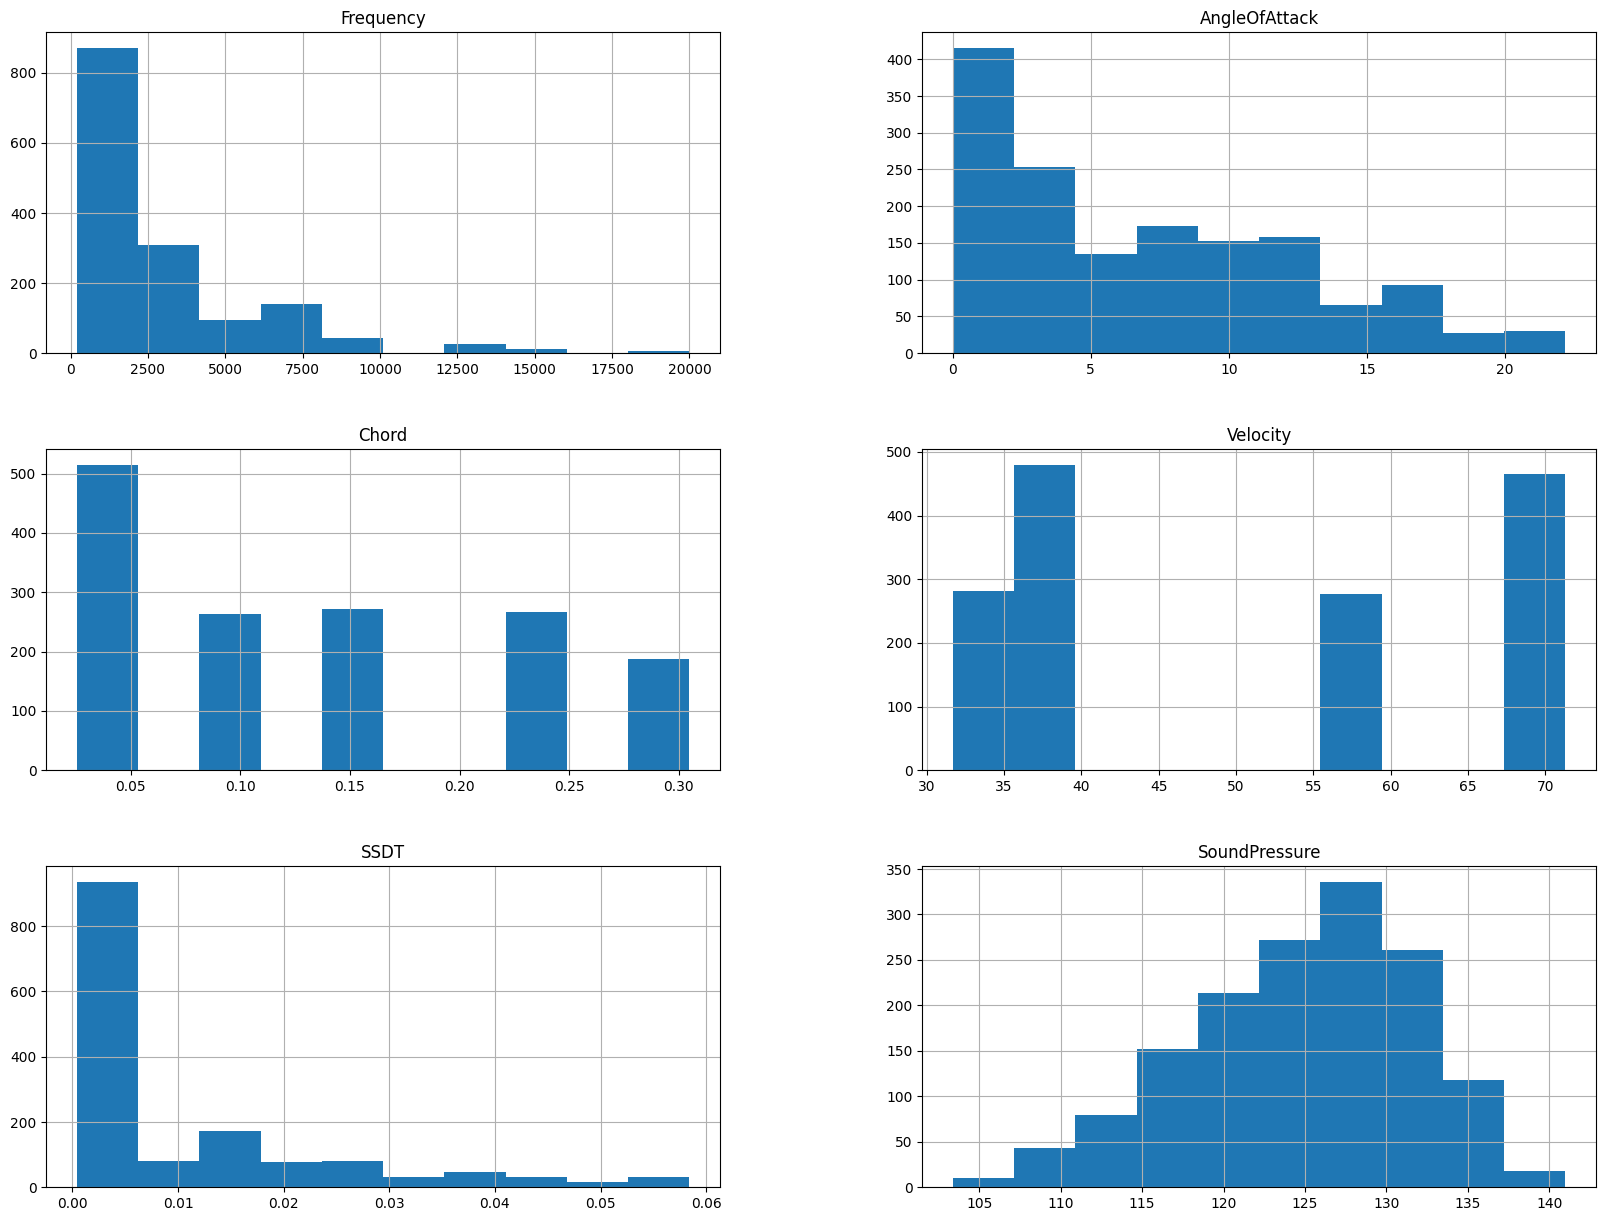

In [28]:
airFoil.hist(figsize=(20, 15))
plt.show()

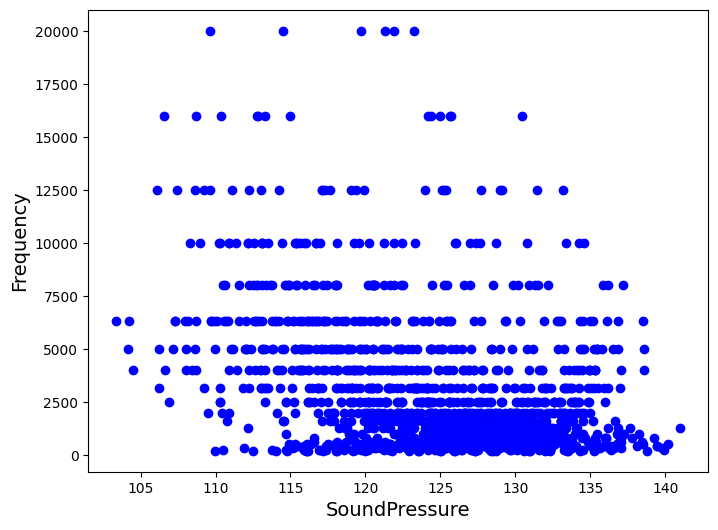

In [42]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(pd.DataFrame(airFoil.SoundPressure), pd.DataFrame(airFoil.Frequency),c="blue")
plt.xlabel('SoundPressure',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

In [60]:
X = airFoil.drop(['SoundPressure'], axis=1)
Y = airFoil.drop(['Frequency', 'AngleOfAttack', 'Chord', 'Velocity', 'SSDT'], axis =1)

In [61]:
X.head()

,Frequency,AngleOfAttack,Chord,Velocity,SSDT
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [63]:
Y.head()

,SoundPressure
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461


In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [95]:
linearReg=LinearRegression()
linearReg.fit(x_train, y_train)

LinearRegression()

In [96]:
y_pred=linearReg.predict(x_test)
y_pred

array([[126.46274574],
       [120.47595194],
       [117.75855607],
       [129.1302893 ],
       [124.78612694],
       [129.17418953],
       [120.2561083 ],
       [133.30641759],
       [119.37807655],
       [126.10083781],
       [125.0349905 ],
       [126.96955201],
       [132.49347482],
       [121.02713693],
       [123.7448257 ],
       [119.04999283],
       [128.7846024 ],
       [123.20317239],
       [117.92428406],
       [125.07955073],
       [122.22646665],
       [127.36695301],
       [127.37487951],
       [126.08211442],
       [128.98413633],
       [122.65895214],
       [116.79252578],
       [126.84533737],
       [128.08454543],
       [126.14137454],
       [129.75388362],
       [124.11755832],
       [109.262863  ],
       [127.61480252],
       [127.91164858],
       [129.77440024],
       [119.9497899 ],
       [104.15794221],
       [126.89911793],
       [129.72858658],
       [131.99044372],
       [122.86400594],
       [124.94767529],
       [118

In [97]:
Accuracy=r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Accuracy of the model is 52.37


Text(0, 0.5, 'Predicted')

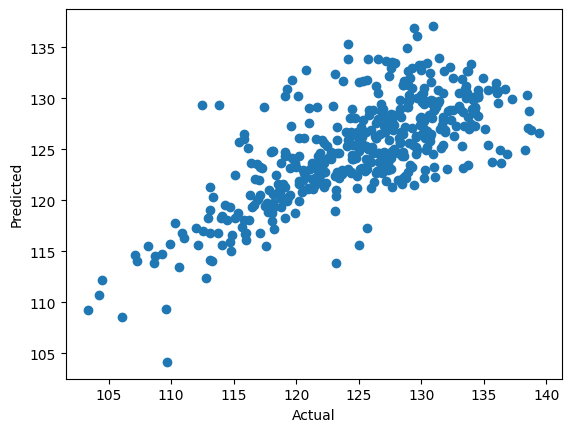

In [98]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='SoundPressure'>

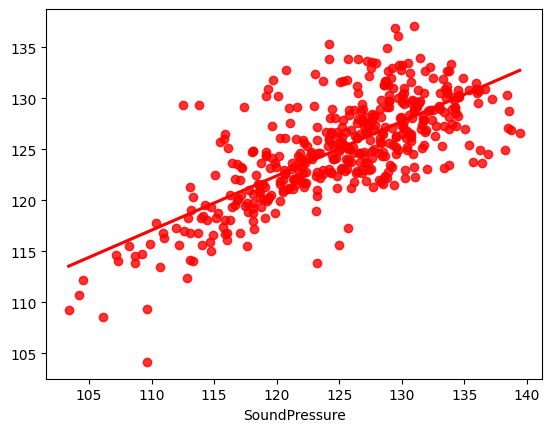

In [99]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')